# Capstone Project HR Advisories - 1019_GCD_Capstone_Project

---



# Table Contents:

###1. [Problem Statement](#Section1)<br>
###2. [Dataset Description](#Section1)<br>
###3. [Importing important liberaries](#Section1)<br>
###4. [Examine the Data](#Section1)<br>
###5. [Data pre-processing](#Section1)<br>
###6. [Data post-processing](#Section1)<br>
###7. [EDA and Inferences](#Section1)<br>
###8. [Feature Engineering](#Section1)<br>
###9. [Data Splitting into train and test](#Section1)<br>
###10. [Normalization Scaling](#Section1)<br>
###11. [Building models without Smote](#Section1)<br>
###12. [Building models with Smote](#Section1)<br>
###13. [PCA](#Section1)<br>
###14. [Hyper-parameters Tuning of the models](#Section1)<br>
###15. [Cross-validation of the Model](#Section1)<br>
###16. [Analyzation on Unseen data](#Section1)<br>
###17. [Predict the label values using the earlier trained Random Forest Regression Model](#Section1)<br>


#1. [Problem Statement](#Section1)<br>

##The Client for project is from HR Department at a software company##

They want to try a new initiative to retain employees.
The idea is to use data to predict whether an employee is likely to leave.
Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
They only want to deal with the data that is related to permanent employees.

##Current Practice##
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

##This suffers from the following problems:##

This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
The second problem is these insights can't be aggregated and interlaced across all employees who have left.
The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.


#2. [Dataset Description](#Section1)<br>

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

##A)department_data
This dataset contains information about each department. The schema of the dataset is as follows:

dept_id – Unique Department Code

dept_name – Name of the Department

dept_head – Name of the Head of the Department

##B)employee_details_data
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

employee_id – Unique ID Number for each employee

age – Age of the employee

gender – Gender of the employee

marital_status – Marital Status of the employee

##C)employee_data
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

##Target variable

status – Current employment status (Employed / Left)

##Administrative information

department – Department to which the employees belong(ed) to

salary – Salary level with respect to rest of their department

tenure – Number of years at the company

recently_promoted – Was the employee promoted in the last 3 years?

employee_id – Unique ID Number for each employee

##Workload information

n_projects – Number of projects employee has worked on

avg_monthly_hrs – Average number of hours worked per month

###Mutual evaluation information

satisfaction – Score for employee’s satisfaction with the company (higher is better)

last_evaluation – Score for most recent evaluation of employee (higher is better)

filed_complaint – Has the employee filed a formal complaint in the last 3 years?


##Consulting Goal:
###Your Role

You are given datasets of past employees and their status (still employed or already left).
Your task is to build a classification model using the datasets.
Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. You need to build the best possible model.

##Problem Specifics

Deliverable: Predict whether an employee will stay or leave.
Machine learning task: Classification
Target variable: Status (Employed/Left)
Win condition: N/A (best possible model)

#3  [Importing important liberaries](#Section1)<br>

In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install -q --upgrade pandas-profiling


In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import plotly.graph_objs as go                                      # Importing plotly for interactive visualizations
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                   # Importing to scale the features in the dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split                # To properly split the dataset into train and test sets
from sklearn.linear_model import LogisticRegression                   # To create a linear regression model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                  # To create a random forest regressor model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics                                         # Importing to evaluate the model used for regression
from sklearn.decomposition import PCA                               # Importing to create an instance of PCA model
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # For time functionality
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [ ]:
!pip install sweetviz
!pip install imblearn

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

#4. [Examine the Data](#Section1)<br>


In [ ]:
!pip install mysql-connector-python

In [ ]:
#Establishment of connection with SQL Server
import mysql.connector
def conn_db():
              mydb=mysql.connector.connect(host='cpanel.insaid.co',
                        database='Capstone2',
                        user='student',
                        password='student')
              return mydb

In [ ]:
#Fetching all rows from SQL datasets
c=conn_db()
department_data=pd.read_sql("SELECT * FROM department_data ",c)
employee_details_data=pd.read_sql("SELECT * FROM employee_details_data",c)
employee_data=pd.read_sql("SELECT * FROM employee_data",c)
c.close()

##4.1) Department data information

In [ ]:
department_data.shape

(11, 3)

In [ ]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [ ]:
department_data.describe()

,dept_id,dept_name,dept_head
count,11,11,11
unique,11,11,11
top,D00-IT,IT,Henry Adey
freq,1,1,1


In [ ]:
pip install markupsafe==2.0.1

  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
from pandas_profiling import ProfileReport     # Import Pandas Profiling (To generate Univariate Analysis) 
department_data_report=ProfileReport(department_data)
department_data_report.to_file(output_file='department_data_Profiling_Report.html')
print('Accomplished!')
department_data_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
import sweetviz as sv
department_data_report_sv = sv.analyze(department_data)
department_data_report_sv.show_html('department_data_report_sv.html')

                                             |          | [  0%]   00:00 -> (? left)

Report department_data_report_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###Information gained from department_data
1) No. of variables 3(dept_id,dept_name,dept_head) and 11 rows with no missing values in rows.

2)High corelation between columns.

3)Every column has Text value.

##4.2) Employee data information

In [ ]:
employee_data.shape

(14150, 11)

In [ ]:
employee_data.head(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00000,None,NaN,0.86684,6,NaN,medium,0.13442,Left,4.00000,124467
1,134.00000,None,NaN,0.55572,2,NaN,low,0.51104,Left,3.00000,112210
2,156.00000,D00-SS,1.00000,0.47408,2,NaN,medium,0.40510,Left,3.00000,126150
3,256.00000,D00-SP,NaN,0.96136,6,NaN,low,0.15297,Left,4.00000,125346
4,146.00000,D00-SS,NaN,0.50735,2,NaN,medium,0.43484,Left,3.00000,113707


In [ ]:
employee_data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
employee_data_report=ProfileReport(employee_data)
employee_data_report.to_file(output_file='employee_data_Profiling_Report.html')
print('Accomplished!')
employee_data_report

In [ ]:
import sweetviz as sv
employee_data_report_sv = sv.analyze(employee_data)
employee_data_report_sv.show_html('employee_data_report_sv.html')

                                             |          | [  0%]   00:00 -> (? left)

Report employee_data_report_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Information gained from employee_data
1)11 columns and 14150 rows, with 6 numeric and 5 categorical columns.

2)dept column having 707,last_evalution 1487,satisfaction 150,tenure 150 missing data

3) Field_complaint and recently promoted data columns are invalid

4) avg_monthly_hrs,n_projects,salary,status,employee_id has no missing values

5) tenure is between 2 to 10, status(Empoyeed or left),satisfaction(min 0.04 to 1) avg_monthly_hr(49 to 310),n_projects(1 t0 7),last_evalution(0.316 to 1)

##4.3) Employee_details_data information

In [ ]:
employee_details_data.shape

(14245, 4)

In [ ]:
employee_details_data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [ ]:
employee_details_data.head(5)

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
employee_details_data_report=ProfileReport(employee_details_data)
employee_details_data_report.to_file(output_file='employee_details_data_Profiling_Report.html')
print('Accomplished!')
employee_details_data_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
import sweetviz as sv
employee_details_data_report_sv = sv.analyze(employee_details_data)
employee_details_data_report_sv.show_html('employee_details_data_report_sv.html')

                                             |          | [  0%]   00:00 -> (? left)

Report employee_details_data_report_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###Information gained from employee_details_data
1) 4 columns (employee_id,age,geder,marital_status)with 14245 rows, 2categorical and 2 numerical columns

2)Age(22 to 57),marital_status(married,unmarried),gender (mail,female),employee_id(100101 to 148988)

3)No missing and duplicate rows.

4)Male 9,382  66%

Female 4,863  34%

5)Unmarried7,28351%

Married6,96249%

6)24  -- 1,319   9.3%(24 age people are highest in count)

25  --  1,255   8.8%

23  --  1,209   8.5%

22  --  1,175   8.2%

#5) [Data pre-processing](#Section1)<br>


##5.1) emp_id of employee data:

In [ ]:
employee_data.isna().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

In [ ]:
employee_data.duplicated().sum()#29 rows are duplicated

29

In [ ]:
employee_data.drop_duplicates(inplace=True)
len(employee_data)

14121

In [ ]:
employee_data.shape

(14121, 11)

In [ ]:
len(employee_data['employee_id'].unique())

14117

In [ ]:
employee_data[employee_data['employee_id']==0] #filtering dataset where employeee_id=0

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.00000,D00-SS,NaN,0.85270,6,NaN,low,0.06917,Left,4.00000,0
304,264.00000,D00-ENG,NaN,0.77455,6,NaN,low,0.11097,Left,4.00000,0
1234,129.00000,D00-SP,NaN,0.40266,2,NaN,medium,0.43736,Left,3.00000,0
11304,167.00000,None,NaN,0.88005,5,NaN,low,0.68214,Employed,3.00000,0
12304,259.00000,D00-ENG,NaN,0.50588,5,NaN,low,0.63105,Employed,4.00000,0


In [ ]:
index_names = employee_data[employee_data['employee_id']==0].index
employee_data.drop(index_names, inplace = True)
employee_data.shape  #Removing rows where employee_id=0

(14116, 11)

##5.2) filed_complaint of employee data:

In [ ]:
employee_data["filed_complaint"].isna().sum()

12075

In [ ]:
employee_data["filed_complaint"].fillna(0,inplace=True)#filling nan value with 0 (assumption no one has filed complaint)

In [ ]:
employee_data["filed_complaint"].isna().sum()

0

In [ ]:
employee_data["filed_complaint"].unique()

array([0., 1.])

In [ ]:
employee_data["filed_complaint"]=employee_data["filed_complaint"].astype('int64')#changing the datatype as int64

##5.3)recently_promoted

In [ ]:
employee_data["recently_promoted"].isna().sum()

13819

In [ ]:
employee_data["recently_promoted"].unique()

array([nan,  1.])

In [ ]:
employee_data["recently_promoted"].fillna(0,inplace=True)#replaceing nan with 0 (no promotion is assumption)

In [ ]:
employee_data["recently_promoted"]=employee_data["recently_promoted"].astype('int64')#changing the datatype as int64

In [ ]:
employee_data["recently_promoted"].isna().sum()


0

In [ ]:
employee_data.isna().sum() #To check how many column left to fill the value

avg_monthly_hrs         0
department            706
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
dtype: int64

##5.4) Department

In [ ]:
employee_data['department'].value_counts()

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [ ]:
employee_data["department"] = employee_data["department"].replace({"-IT":"D00-IT"})#converting "-IT" to "D00-IT"

In [ ]:
employee_data["department"].fillna("D00-Missing",inplace = True)#Assigning missing value to a category so that we can analyse missing values seperatly

In [ ]:
employee_data['department'].value_counts()

D00-SS         3895
D00-ENG        2573
D00-SP         2108
D00-IT         1359
D00-PD          853
D00-MT          812
D00-FN          722
D00-Missing     706
D00-MN          590
D00-AD          175
D00-PR          173
D00-TP          150
Name: department, dtype: int64

In [ ]:
employee_data.isna().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
dtype: int64

##5.5) Satisfaction and Tenure

In [ ]:
employee_data[employee_data["satisfaction"].isnull()]["department"].value_counts() #from here we can see satisfaction for only "D00-TP" department is misssing

D00-TP    150
Name: department, dtype: int64

In [ ]:
employee_data[employee_data["tenure"].isnull()]["department"].value_counts() #from here we can see tenure for only "D00-TP" department is misssing

D00-TP    150
Name: department, dtype: int64

In [ ]:
employee_data.drop(employee_data[employee_data['department']=="D00-TP"].index, inplace = True) #As given in discription of project consider only permanent employees , we are deleting employees who belongs to temporaray dept

In [ ]:
employee_data.isna().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1337
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
employee_id             0
dtype: int64

##5.6) last_evaluation 

In [ ]:
employee_data["last_evaluation"].isna().sum()

1337

In [ ]:
employee_data["last_evaluation"].unique()

array([0.866838, 0.555718, 0.474082, ..., 0.643553, 0.836603, 0.907277])

In [ ]:
employee_data[employee_data["last_evaluation"].isnull()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
21,127.00000,D00-ENG,0,NaN,2,0,low,0.37051,Left,3.00000,114322
28,156.00000,D00-Missing,0,NaN,2,0,medium,0.46575,Left,3.00000,128509
39,154.00000,D00-SP,0,NaN,2,1,medium,0.44015,Left,3.00000,110293
49,159.00000,D00-ENG,0,NaN,2,0,high,0.37598,Left,3.00000,111951
57,129.00000,D00-SS,0,NaN,2,0,low,0.44752,Left,3.00000,125903
71,153.00000,D00-Missing,0,NaN,2,0,low,0.45510,Left,3.00000,121337
94,158.00000,D00-SP,0,NaN,2,0,low,0.33834,Left,3.00000,129462
104,151.00000,D00-SS,0,NaN,2,0,low,0.42148,Left,3.00000,111116
110,153.00000,D00-FN,0,NaN,2,0,low,0.35623,Left,3.00000,117468
121,202.00000,D00-SS,0,NaN,3,0,medium,0.42550,Left,3.00000,113867


In [ ]:
employee_data[employee_data["last_evaluation"].isnull()]["department"].value_counts() #D00-ss department has more missing values for last_evalution

D00-SS         347
D00-ENG        242
D00-SP         206
D00-IT         144
D00-PD          91
D00-MT          83
D00-Missing     66
D00-FN          62
D00-MN          57
D00-AD          22
D00-PR          17
Name: department, dtype: int64

In [ ]:
employee_data[employee_data["last_evaluation"].isnull()]["tenure"].value_counts() 

3.00000    897
2.00000    440
Name: tenure, dtype: int64

*   All null values are for the employees whose tenure < 3 years or tennure column empty

*   This implicates that evaluation has not happened to these employees

*   Replacing the last evaluation score to mean score of the department to be evaluated







In [ ]:
median_df= employee_data.groupby(by="department").median()
median_df

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
department,,,,,,,,
D00-AD,196.00000,0.00000,0.74075,4.00000,0.00000,0.64612,3.00000,110927.00000
D00-ENG,201.00000,0.00000,0.73307,4.00000,0.00000,0.65124,3.00000,110953.00000
D00-FN,199.00000,0.00000,0.73681,4.00000,0.00000,0.61188,3.00000,111373.00000
D00-IT,200.00000,0.00000,0.72617,4.00000,0.00000,0.66064,3.00000,111518.00000
D00-MN,203.00000,0.00000,0.74054,4.00000,0.00000,0.65592,3.00000,111396.50000
D00-MT,198.00000,0.00000,0.71227,4.00000,0.00000,0.65074,3.00000,111281.50000
D00-Missing,197.00000,0.00000,0.73569,4.00000,0.00000,0.61878,3.00000,111223.50000
D00-PD,198.00000,0.00000,0.72692,4.00000,0.00000,0.65607,3.00000,111101.00000
D00-PR,195.00000,0.00000,0.69604,4.00000,0.00000,0.66970,3.00000,109435.00000


In [ ]:
employee_data.last_evaluation= employee_data.groupby('department').last_evaluation.apply(lambda x: x.fillna(x.median()))

In [ ]:
employee_data.isna().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
dtype: int64

In [ ]:
# 57 index crosscheck and for last_evaluation that  should come :0.70478 because department for this employee is D00-SS
employee_data.loc[57]

avg_monthly_hrs     129.00000
department             D00-SS
filed_complaint             0
last_evaluation       0.70478
n_projects                  2
recently_promoted           0
salary                    low
satisfaction          0.44752
status                   Left
tenure                3.00000
employee_id            125903
Name: 57, dtype: object

###alternate code for missing value fill
def fill_with_mean(x):
    if pd.isnull(x['last_evaluation']):
        return avg_df[(avg_df['department'] == x['department'])]['last_evaluation'].values[0]
    else:
        return x['last_evaluation']
    
E_data['last_evaluation'] = E_data.apply(fill_with_mean, axis=1)
E_data.head()


##5.7) Merging Datasets:

### Joining employee_details_data and employee_data on employee_id

In [ ]:
df_final= pd.merge(employee_data, employee_details_data, on='employee_id', how='inner')
len(df_final)

13966

In [ ]:
df_final.shape

(13966, 14)

In [ ]:
df_final.sample(5)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
6840,174.00000,D00-IT,0,0.94867,3,0,low,0.82635,Employed,2.00000,101524,24,Male,Unmarried
10669,148.00000,D00-PD,0,0.94541,3,0,medium,0.70655,Employed,2.00000,111942,23,Female,Unmarried
10408,232.00000,D00-SS,0,0.54666,5,0,medium,0.20392,Employed,3.00000,100931,32,Male,Married
2427,199.00000,D00-SS,1,0.77839,5,0,medium,0.96718,Employed,10.00000,101610,27,Female,Married
12283,157.00000,D00-Missing,0,0.66656,4,0,medium,0.82749,Employed,2.00000,116335,25,Female,Unmarried


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13966 entries, 0 to 13965
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  int64  
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  int64  
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        13966 non-null  int64  
 11  age                13966 non-null  int64  
 12  gender             13966 non-null  object 
 13  marital_status     13966 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.6+ MB


#6. [Data post-processing](#Section1)<br>


6.1.1) Department feature : Replaced department name '-IT' with 'D00-IT' (207 nos.)

6.1.2) Department feature : filled the missing values with new department name as D00-Missing (707 nos.)
 
6.2) Removed duplicate rows (29nos.)

6.3) Tenure feature : Dropped tenure for those missing employees, whose tenure is temporary (150 nos.)

6.4) Filed_complaint feature : Replaced nan (2,046 nos.)with zero values. Assumption : 1 implies evaluation completed and nan (replacing with 0) implies evalution not done

6.5) recently_promoted feature : Replaced nan  (13,853 nos.)with zero values. Assumption : 1 implies recently promoted and nan (replacing with 0) implies not recently promoted

6.6) last_evaluation feature : Replacing nan (1,487 nos.) with meadian with respect to department.

6.7) satisfaction feature : Replaced nan with meadian with respect to department.



#7. [EDA and Inferences](#Section1)<br>


##7.1) Distribution of status

In [ ]:
df_final['status'].value_counts()

Employed    10631
Left         3335
Name: status, dtype: int64

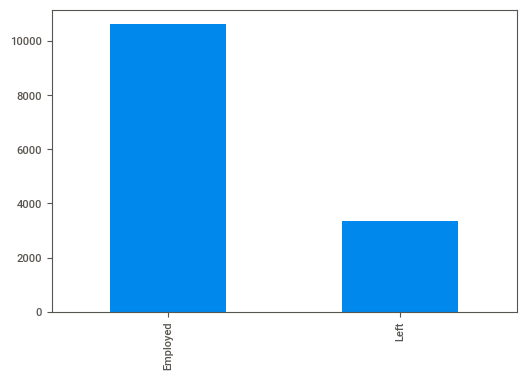

In [ ]:
df_final['status'].value_counts().plot(kind="bar")

##7.2) Box plot of Status with respect to avg_monthly_hrs

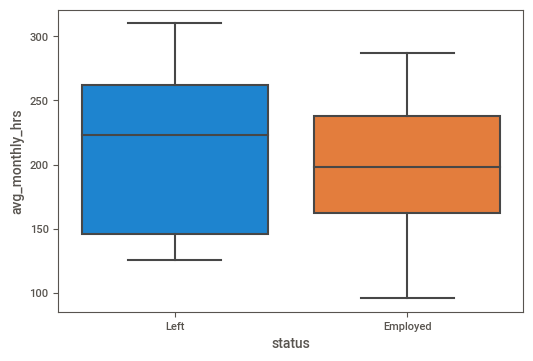

In [ ]:
sns.boxplot(x ='status', y ='avg_monthly_hrs', data = df_final)

##7.3) Percentage of employeed and left employees with respect to department

In [ ]:
df_department=df_final.groupby("status")["department"].value_counts(normalize=True)
df_department

status    department 
Employed  D00-SS        0.27711
          D00-ENG       0.18051
          D00-SP        0.14947
          D00-IT        0.09990
          D00-PD        0.06265
          D00-MT        0.05804
          D00-FN        0.04976
          D00-MN        0.04750
          D00-Missing   0.04713
          D00-PR        0.01477
          D00-AD        0.01317
Left      D00-SS        0.28456
          D00-ENG       0.19610
          D00-SP        0.15562
          D00-IT        0.08906
          D00-Missing   0.06147
          D00-MT        0.05847
          D00-FN        0.05787
          D00-PD        0.05607
          D00-MN        0.02549
          D00-AD        0.01049
          D00-PR        0.00480
Name: department, dtype: float64

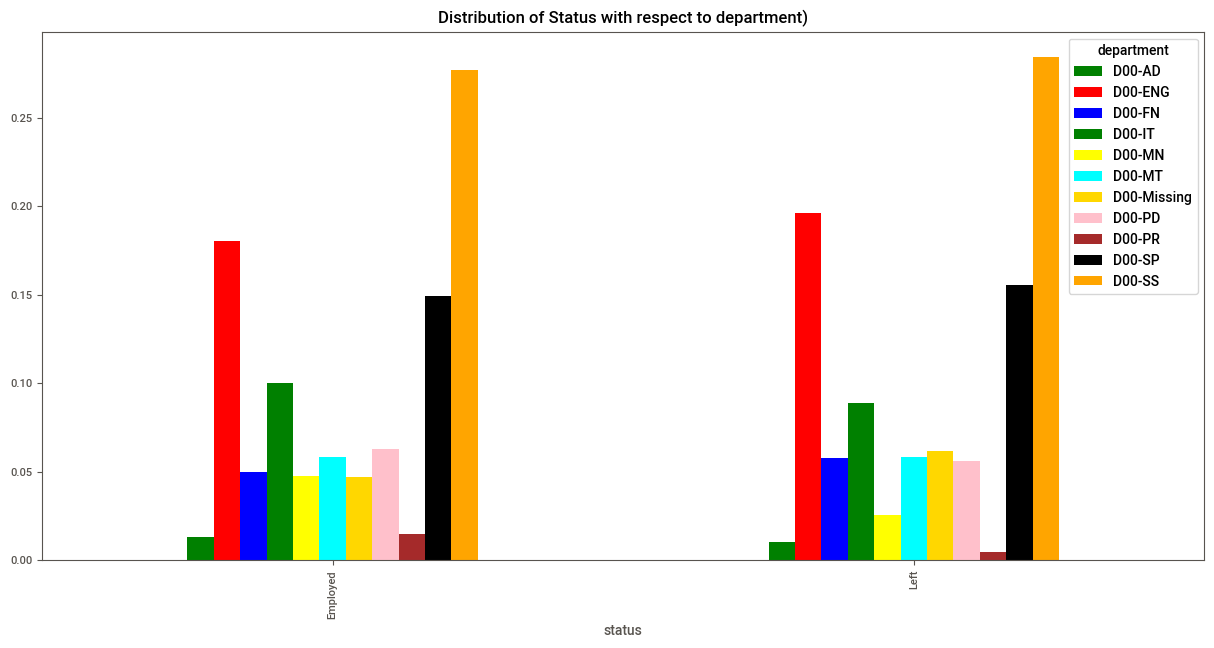

In [ ]:
df_department=df_final.groupby("status")["department"].value_counts(normalize=True)
df_department.unstack(level=-1).plot(kind='bar',figsize = (15,7),title = "Distribution of Status with respect to department)",stacked=False, color=["green","red","blue","green","yellow","cyan","gold","pink","brown","black","orange"])

##7.4) Percentage of employees Status with respect to filed_complaint

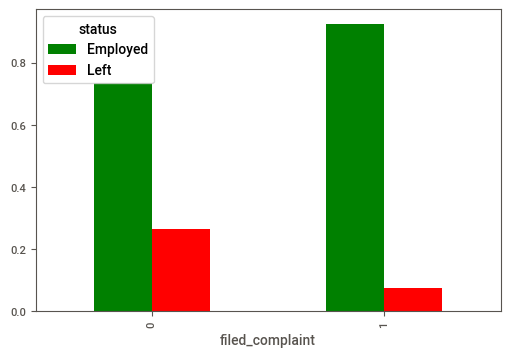

In [ ]:
filed_complaint_status= df_final.groupby("filed_complaint")["status"].value_counts(normalize=True).nlargest(n=100).unstack(level=-1).head(10).plot(kind='bar',stacked=False, color=["green", "red"])

##7.5) Distribution of Status with respect to last_evaluation

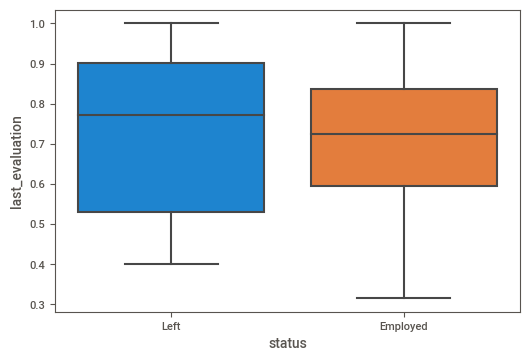

In [ ]:
sns.boxplot(x ='status', y ='last_evaluation', data = df_final)

##7.6) Percentage of employees Status with respect to n_projects

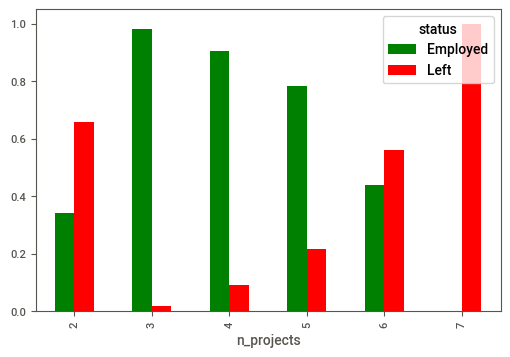

In [ ]:
projects_status= df_final.groupby(["n_projects"])["status"].value_counts(normalize=True).nlargest(n=100).unstack(level=-1).head(10).plot(kind='bar',stacked=False, color=["green", "red"])

##7.7) Percentage of employees Status with respect to recently_promoted

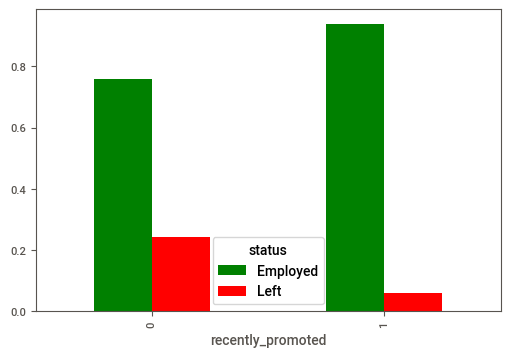

In [ ]:
promoted_status= df_final.groupby(["recently_promoted"])["status"].value_counts(normalize=True).unstack(level=-1).head(10).plot(kind='bar',stacked=False, color=["green", "red"])

##7.8) Percentage of employees Status with respect to salary

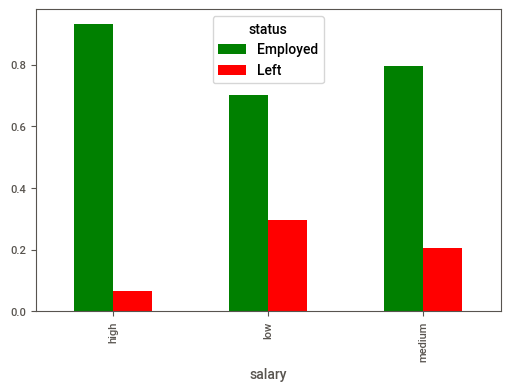

In [ ]:
salary_satatus= df_final.groupby(["salary"])["status"].value_counts(normalize=True).unstack(level=-1).head(10).plot(kind='bar',stacked=False, color=["green","Red"])

##7.9) Distribution of Status with respect to satisfaction

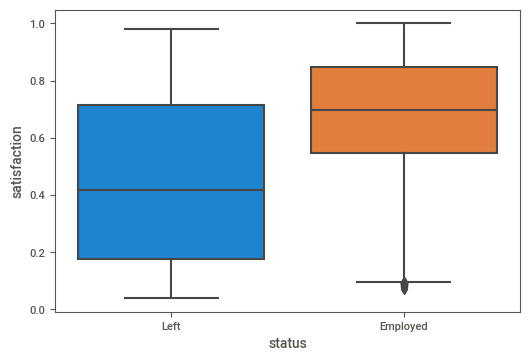

In [ ]:
sns.boxplot(x ='status', y ='satisfaction', data = df_final)

##7.10) Percentage of employees Status with respect to tenure

In [ ]:
df_final.groupby(["tenure"])["status"].value_counts(normalize=True)

tenure    status  
2.00000   Employed   0.98410
          Left       0.01590
3.00000   Employed   0.75158
          Left       0.24842
4.00000   Employed   0.65046
          Left       0.34954
5.00000   Left       0.56566
          Employed   0.43434
6.00000   Employed   0.71168
          Left       0.28832
7.00000   Employed   1.00000
8.00000   Employed   1.00000
10.00000  Employed   1.00000
Name: status, dtype: float64

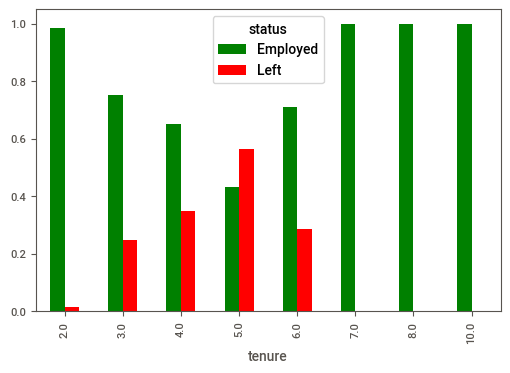

In [ ]:
tenure_status= df_final.groupby(["tenure"])["status"].value_counts(normalize=True).unstack(level=-1).head(10).plot(kind='bar',stacked=False, color=["green","Red"])

##7.11) Percentage of employees Status with respect to age

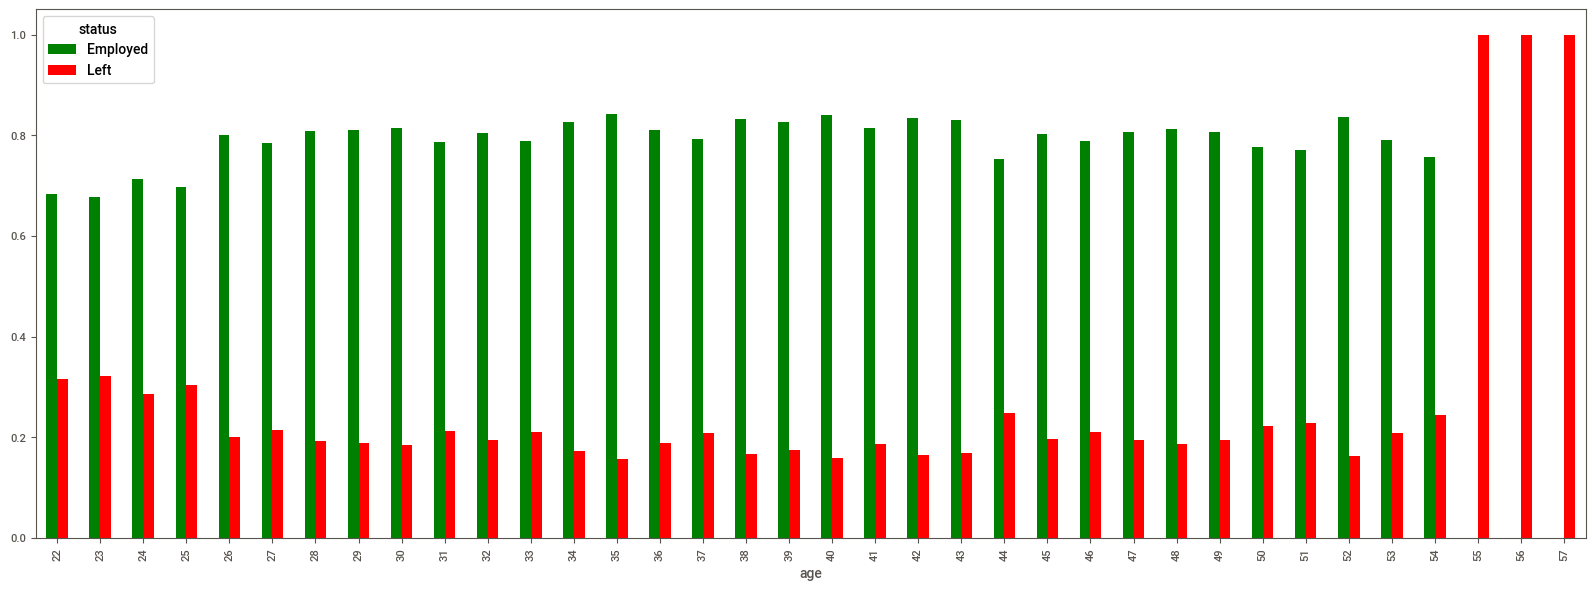

In [ ]:
age_status= df_final.groupby(["age"])["status"].value_counts(normalize=True).unstack(level=-1).plot(kind='bar',figsize = (20,7),stacked=False, color=["green", "red"])

##7.12) Percentage of employees Status with respect to gender

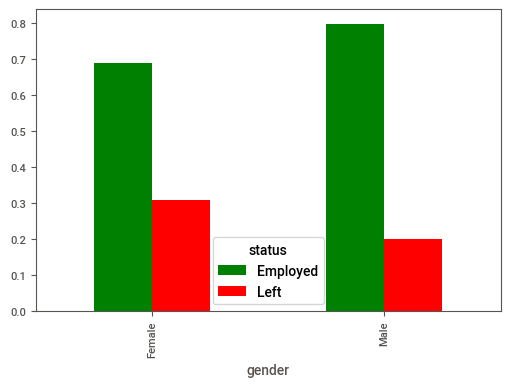

In [ ]:
gender_status= df_final.groupby(["gender"])["status"].value_counts(normalize=True).unstack(level=-1).plot(kind='bar',stacked=False, color=["green", "red"])

##7.13) Percentage of employees Status with respect to MaritalStatus

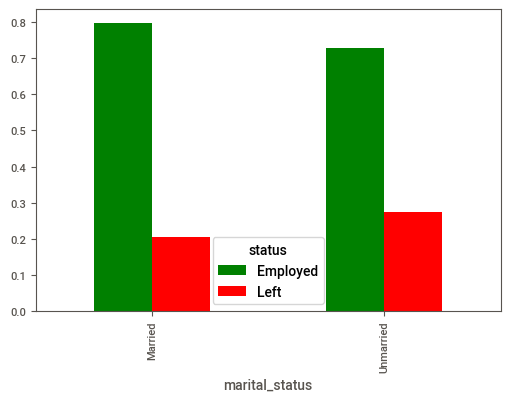

In [ ]:
maritalstatus_sttus= df_final.groupby(["marital_status"])["status"].value_counts(normalize=True).unstack(level=-1).plot(kind='bar',stacked=False, color=["green", "RED"])

##7.14) Heatmap

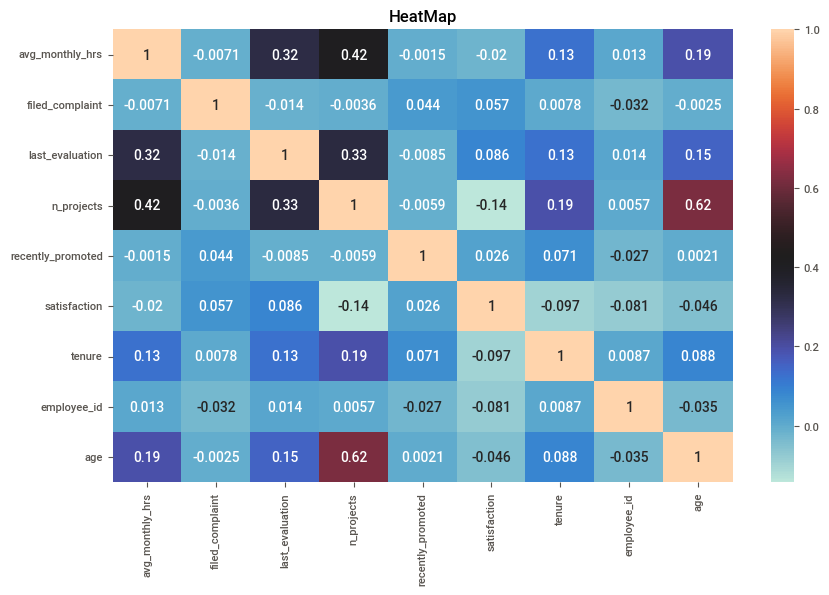

In [ ]:
import matplotlib.pyplot as plt
plt.figure (figsize =(10,6))
sns.heatmap(df_final.corr(),annot=True,cmap ='icefire').set_title('HeatMap')
plt.show()

## EDA (Exploratory Data Analysis) Observations :

1) Attrition rate found to be **23.87 % (3335/13966)** in this Organisation.

2) Employees who are employed works between an avg. working hrs of **160 to 240 hrs**. However, in the case of Employees who left worked between **150 to 260 hrs**.
 
3) Department **D00-SS** has the highest attrition rate of **30%**, followed by **D00-ENG** with **20%** and then **D00-SP** with **15%**

4) **18%** ofEmployees who are employed have filed complaint with respect to only **4%** who left the organisation. 

5) Employees who are employed have last evaluation score between **0.52 to 0.9**. However, in the case of Employees who left have scrore between **0.6 to 0.85**.

6) Employees who are employed generally have the no. of Projects as **3, 4 ,5**. However, in the case of Employees who left have no. of Projects as **2, 6, 7**.

7) Employees who are employed have recently promoted is only **2%** of total employees. However, in the case of Employees who left are only **0.25%**.

8) **High** Salary  has the least attrition rate of **5%** in that salary bracket, where as for **Medium** salary bracket is **20%** and that of **Low** salary has **25%**

9) Employees who are employed have better satisfaction score between **0.58 to 0.85**. However, in the case of Employees who left have scrore between **0.18 to 0.70**.

10) Employees who are has tenue of **2, 7 ,8, 10** is likely to employed. However, Employees who has tenure  of **3, 4, 5, 6** is likely to leave the organisation. Tenue of **5** has maximum chance of leaving the organisation.

11) There is a probabilty of **25 -30%** employee leaving the organisation if the age range between **22 -25** years and there is **100%** probability if the employee age is beyound **55** years

12) There is a probabilty of **30%** if the employee is a **FEMALE** leaving the organisation and that becomes **20%** if the employee is a **MALE**.

13) There is a probabilty of **28%** if the employee is a **UNMARRIED** leaving the organisation and that becomes **20%** if the employee is a **MARRIED**.

14) There is maximum co-relation between **age** and **n_project** of **0.62**, follwed by co-relation between **avg_monthly_hrs** and **n_project** of **0.42** and then co-relation between **last_evaluation** and **n_project** of **0.33** 


#8. [Feature Engineering](#Section1)<br>

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13966 entries, 0 to 13965
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    13966 non-null  float64
 1   department         13966 non-null  object 
 2   filed_complaint    13966 non-null  int64  
 3   last_evaluation    13966 non-null  float64
 4   n_projects         13966 non-null  int64  
 5   recently_promoted  13966 non-null  int64  
 6   salary             13966 non-null  object 
 7   satisfaction       13966 non-null  float64
 8   status             13966 non-null  object 
 9   tenure             13966 non-null  float64
 10  employee_id        13966 non-null  int64  
 11  age                13966 non-null  int64  
 12  gender             13966 non-null  object 
 13  marital_status     13966 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 2.1+ MB


In [ ]:
df_final.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status'],
      dtype='object')

In [ ]:
#data_categorical = df_final[['department','status','salary','gender',  'marital_status' ]]
data_categorical = df_final[['department','status','salary']]
data_categorical.head()

,department,status,salary
0,D00-Missing,Left,medium
1,D00-Missing,Left,low
2,D00-SS,Left,medium
3,D00-SP,Left,low
4,D00-SS,Left,medium


In [ ]:
data_categorical = data_categorical.apply(LabelEncoder().fit_transform)
data_categorical.head()

,department,status,salary
0,6,1,2
1,6,1,1
2,10,1,2
3,9,1,1
4,10,1,2


In [ ]:
#data_categorical_one_hot = df_final[['salary']]
#data_categorical_one_hot.sample(5)

In [ ]:
#data_categorical_one_hot = pd.get_dummies(data_categorical_one_hot,drop_first=True)
#data_categorical_one_hot.sample(5)

In [ ]:
###data_numerical = df_final[[ 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation',
###       'n_projects', 'recently_promoted', 'satisfaction',
###       'tenure', 'employee_id', 'age']]
data_numerical = df_final[[ 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation','n_projects', 'recently_promoted', 'satisfaction','tenure', 'employee_id']]
data_numerical.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
0,246.00000,0,0.86684,6,0,0.13442,4.00000,124467
1,134.00000,0,0.55572,2,0,0.51104,3.00000,112210
2,156.00000,1,0.47408,2,0,0.40510,3.00000,126150
3,256.00000,0,0.96136,6,0,0.15297,4.00000,125346
4,146.00000,0,0.50735,2,0,0.43484,3.00000,113707


In [ ]:
#data_model = pd.concat([data_categorical,data_categorical_one_hot,data_numerical], axis=1)
data_model = pd.concat([data_categorical,data_numerical], axis=1)
data_model.head()

,department,status,salary,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
0,6,1,2,246.00000,0,0.86684,6,0,0.13442,4.00000,124467
1,6,1,1,134.00000,0,0.55572,2,0,0.51104,3.00000,112210
2,10,1,2,156.00000,1,0.47408,2,0,0.40510,3.00000,126150
3,9,1,1,256.00000,0,0.96136,6,0,0.15297,4.00000,125346
4,10,1,2,146.00000,0,0.50735,2,0,0.43484,3.00000,113707


## Feature Engineering Observations :

Here we convert the Categorical Variables including the TARGET Variable into numbers by applying on among the below list: 

a) Label Encoding

b) One-Hot Encoding

c) Ordinal Encoding

In this case we are taking only 3 categorical variables viz. '**department**', '**status**', '**salary**' as the unseen test data has only these Categorical Columns and the Target Variable **status** as well
The target variable should be **1** for the Left and **0** for the Employed


#9. [Data Splitting into Train and Test](#Section1)<br>


- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

In [ ]:
y = data_model[['status']]
y.head()

,status
0,1
1,1
2,1
3,1
4,1


### Since the Final Test/Unseen data has only 9 Features/Columns apart from employee_id, we take the same number of features in the Train/Test data sets

In [ ]:
x2 = data_model.drop('status',axis=1)
x2.head()
x = x2.drop('employee_id',axis=1)
x.head()


,department,salary,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
0,6,2,246.00000,0,0.86684,6,0,0.13442,4.00000
1,6,1,134.00000,0,0.55572,2,0,0.51104,3.00000
2,10,2,156.00000,1,0.47408,2,0,0.40510,3.00000
3,9,1,256.00000,0,0.96136,6,0,0.15297,4.00000
4,10,2,146.00000,0,0.50735,2,0,0.43484,3.00000


In [ ]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (11172, 9)
y_train shape:  (11172, 1)
x_test shape:  (2794, 9)
y_test shape:  (2794, 1)


## Observation on data split:

The Train data set after split has **11172** Rows/Records and **9** Columns

The Test data set has **2794** Rows/Records and **9** Columns.



#10.[Normalization Scaling](#Section1)<br>


In [ ]:
#from sklearn.preprocessing import Normalizer
#transformer = Normalizer().fit(x_train)
#x_train = transformer.transform(x_train)
#transformer = Normalizer().fit(x_test)
#x_test = transformer.transform(x_test)

Apply Normalizer Scaling to the Data Set (both Train and Test)
-   Normalizer is a scaling Process applied on rows
We did not find Considerable Difference in Results in the ML O/P after Scaling. So, we have not executed the code here.


#11. [Building models without Smote](#Section1)<br>


In [ ]:
from xgboost import XGBClassifier

In [ ]:
#clfs = [LogisticRegression(solver='liblinear'),DecisionTreeClassifier(random_state = 0), RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
#       ,SVC(kernel = 'linear', C = 1,random_state = 0),KNeighborsClassifier(n_neighbors = 6),GaussianNB(), GradientBoostingClassifier(random_state = 0),XGBClassifier(n_estimators=64, random_state=42)]

clfs = [LogisticRegression(solver='liblinear'),DecisionTreeClassifier(random_state = 0), RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
       ,KNeighborsClassifier(n_neighbors = 6),GaussianNB(), GradientBoostingClassifier(random_state = 0),XGBClassifier(n_estimators=64, random_state=42)]

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(x_train, y_train)

  # Make predictions on the trained model
  predictions = clf.predict(x_test)


  ACCURACY_SCORE = accuracy_score(y_test,predictions)
  CLASSIFICATION_REPORT=classification_report(y_test,predictions)
  F1_SCORE=f1_score(y_test,predictions)

  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[ACCURACY SCORE]:', ACCURACY_SCORE, '[Processing Time]:', elapsed_time, 'seconds')
  print('[CLASSIFICATION REPORT]:', CLASSIFICATION_REPORT)

  print('[F1_SCORE]:',F1_SCORE)
  print('----------------------------------------\n')

Performance Metrics of LogisticRegression :
[ACCURACY SCORE]: 0.7616320687186829 [Processing Time]: 0.08094072341918945 seconds
[CLASSIFICATION REPORT]:               precision    recall  f1-score   support

           0       0.80      0.92      0.85      2124
           1       0.51      0.27      0.35       670

    accuracy                           0.76      2794
   macro avg       0.65      0.59      0.60      2794
weighted avg       0.73      0.76      0.73      2794

[F1_SCORE]: 0.34833659491193736
----------------------------------------

Performance Metrics of DecisionTreeClassifier :
[ACCURACY SCORE]: 0.964924838940587 [Processing Time]: 0.10085010528564453 seconds
[CLASSIFICATION REPORT]:               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2124
           1       0.91      0.95      0.93       670

    accuracy                           0.96      2794
   macro avg       0.95      0.96      0.95      2794
weighted avg      

In [ ]:
randforest_model = RandomForestClassifier(random_state=42)
randforest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_train_rf = randforest_model.predict(x_train)
y_pred_test_rf = randforest_model.predict(x_test)
print(y_pred_train_rf)
y_pred_train_rf.shape

[0 0 0 ... 0 1 0]


(11172,)

## Predicting the Probabilities of both Train and Test O/Ps

In [ ]:
# make a prediction 
y_pred_train_new = randforest_model.predict_proba(x_train) 
print(y_pred_train_new)
print(y_pred_train_new.shape)
y_pred_test_new = randforest_model.predict_proba(x_test) 
print(y_pred_test_new)
print(y_pred_test_new.shape)
# show the inputs and predicted probabilities 
#for i in range(len(x_train)): 
#  print("X=%s, Predicted=%s" % (x_train[i], y_pred_train_new[i]))


[[0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.01 0.99]
 [0.98 0.02]]
(11172, 2)
[[0.99 0.01]
 [0.   1.  ]
 [0.01 0.99]
 ...
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]
(2794, 2)


### We have analyze which Algorithm Classifier predicts the BEST RESULT and also check the Computation Time (Before SMOTE)

- We applied the following 7 ML Classifiers on the Data Set:

a) LogisticRegression

b) DecisionTreeClassifier

c) RandomForestClassifier

d) KNeighborsClassifier

e) GaussianNB(), 

f) GradientBoostingClassifier

g) XGBClassifier

 - We got the best result for Basic Model of **Random Forest Classifier** as compared to other Classifiers with the following results:
            
**[ACCURACY SCORE]: 0.98067287043665**

**[Processing Time]: 2.325659990310669 seconds**

**[F1_SCORE]: 0.9589041095890412**


#12. [Building models with Smote](#Section1)<br>

The Data Set was highly IMBALANCED with TARGET variable status having the following counts

**Employed:    10631**

**Left :        3335**


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from typing import Counter
counter=Counter(y_train)
#Oversampling the train dataset with SMOTE
smt=SMOTE()
x_train_sm,y_train_sm=smt.fit_resample(x_train,y_train)
counter=Counter(y_train_sm)
print('After',counter)

After Counter({'status': 1})


### After Implementing SMOTE, Check the total number of RECORDS/ROWS in the data

In [ ]:
print('Training Data Shape:', x_train_sm.shape, y_train_sm.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)
y_train_sm["status"].value_counts()

Training Data Shape: (17014, 9) (17014, 1)
Testing Data Shape: (2794, 9) (2794, 1)


0    8507
1    8507
Name: status, dtype: int64

###Tallying the number of Records/Rows after SMOTE

### Total records in Training Set after SMOTE ==> 8507 + 8507 ==> 17014 Records/Rows
### Total records before SMOTE ==> 11172 + 2794 ==> 13966 Records/Rows
### Total records after... SMOTE ==> 17014 + 2794 ==> 19808 Records/Rows (Increase of 5,842 Rows/Records)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
df_final["status"].value_counts()

(11172, 9)
(11172, 1)
(2794, 9)
(2794, 1)


Employed    10631
Left         3335
Name: status, dtype: int64

In [ ]:
clfs = [LogisticRegression(solver='liblinear'),DecisionTreeClassifier(random_state = 0), RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
       ,KNeighborsClassifier(n_neighbors = 6),GaussianNB(), GradientBoostingClassifier(random_state=0),XGBClassifier(n_estimators=64, random_state=0)]

# Removed SVC (Support Vector Machine Classifier) as it consumes hell lot of a time and useless too....

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(x_train_sm, y_train_sm)

  # Make predictions on the trained model
  predictions = clf.predict(x_test)


  ACCURACY_SCORE = accuracy_score(y_test,predictions)
  CLASSIFICATION_REPORT=classification_report(y_test,predictions)
  F1_SCORE=f1_score(y_test,predictions)

  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[ACCURACY SCORE]:', ACCURACY_SCORE, '[Processing Time]:', elapsed_time, 'seconds')
  print('[CLASSIFICATION REPORT]:', CLASSIFICATION_REPORT)
  print('[F1_SCORE]:',F1_SCORE)

  print('----------------------------------------\n')

Performance Metrics of LogisticRegression :
[ACCURACY SCORE]: 0.7605583392984968 [Processing Time]: 0.09476041793823242 seconds
[CLASSIFICATION REPORT]:               precision    recall  f1-score   support

           0       0.92      0.75      0.83      2124
           1       0.50      0.80      0.62       670

    accuracy                           0.76      2794
   macro avg       0.71      0.77      0.72      2794
weighted avg       0.82      0.76      0.78      2794

[F1_SCORE]: 0.6152961472110409
----------------------------------------

Performance Metrics of DecisionTreeClassifier :
[ACCURACY SCORE]: 0.9549033643521833 [Processing Time]: 0.14148783683776855 seconds
[CLASSIFICATION REPORT]:               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2124
           1       0.88      0.94      0.91       670

    accuracy                           0.95      2794
   macro avg       0.93      0.95      0.94      2794
weighted avg      

We have analyze which **Algorithm Classifier** predicts the **BEST RESULT**
We checked the **Computation Time (after SMOTE)**

We observed that best result obtained from the Basic Model of **Random Forest Classifier** as compared to other Classifiers, results are as follows:
            

**[ACCURACY SCORE]: 0.978167501789549**

**[Processing Time]: 1.8775486946105957 seconds**

**[F1_SCORE]: 0.9542385596399101**


#13. [PCA](#Section1)<br>


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
x_train_sm_pca = pca.fit_transform(x_train_sm)
X_test_sm_pca = pca.transform(x_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.94446477e-01, 4.41925982e-03, 5.82780195e-04, 3.72099654e-04,
       1.14240900e-04])

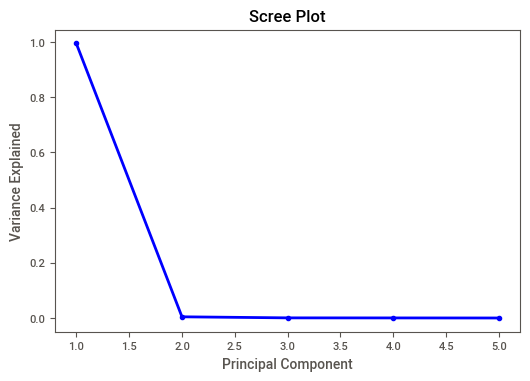

In [ ]:
pc_value=np.arange(pca.n_components_)+1
plt.plot(pc_value,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
#clfs = [LogisticRegression(solver='liblinear'),DecisionTreeClassifier(random_state = 0), RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1),SVC(kernel = 'linear', C = 1,random_state = 0),KNeighborsClassifier(n_neighbors = 6),GaussianNB(), GradientBoostingClassifier(random_state=0),XGBClassifier(n_estimators=64, random_state=0)]

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(x_train_sm_pca, y_train_sm)

  # Make predictions on the trained model
  predictions = clf.predict(X_test_sm_pca)


  ACCURACY_SCORE = accuracy_score(y_test,predictions)
  CLASSIFICATION_REPORT=classification_report(y_test,predictions)
  F1_SCORE=f1_score(y_test,predictions)

  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[ACCURACY SCORE]:', ACCURACY_SCORE, '[Processing Time]:', elapsed_time, 'seconds')
  print('[CLASSIFICATION REPORT]:', CLASSIFICATION_REPORT)
  print('[F1_SCORE]:',F1_SCORE)

  print('----------------------------------------\n')

Performance Metrics of LogisticRegression :
[ACCURACY SCORE]: 0.6277738010021474 [Processing Time]: 0.05822634696960449 seconds
[CLASSIFICATION REPORT]:               precision    recall  f1-score   support

           0       0.81      0.66      0.73      2124
           1       0.33      0.51      0.40       670

    accuracy                           0.63      2794
   macro avg       0.57      0.59      0.56      2794
weighted avg       0.70      0.63      0.65      2794

[F1_SCORE]: 0.3988439306358382
----------------------------------------

Performance Metrics of DecisionTreeClassifier :
[ACCURACY SCORE]: 0.9570508231925555 [Processing Time]: 0.19688916206359863 seconds
[CLASSIFICATION REPORT]:               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2124
           1       0.89      0.94      0.91       670

    accuracy                           0.96      2794
   macro avg       0.93      0.95      0.94      2794
weighted avg      

### **PCA has not improved F1 SCORE and ACCURACY**

#14. [Hyper-parameters Tuning of the models](#Section1)<br>



- The **base-class** **Random Forest Classifier** model **performs well** on our data.

- We will **TUNE** this model to find the **optimal parameters** viz. **n_estimators, max_features, max_depth, criterion**.

In [ ]:
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models

In [ ]:
# Creating a parameter grid for Random Forest only
param_grid_rfc = { 'n_estimators': [90, 100, 110, 120, 150, 200],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [5, 7 , 8, 10, 11, 20, 30],
                  'criterion' :['gini', 'entropy']}

# Putting the parameters in a list
param_grid = [param_grid_rfc]

i = 0

# Creating lists to store scores, models and parameters
best_scores = []
best_models = []
best_params = []

# Instantiating model
clfs = [RandomForestClassifier(random_state=42, class_weight='balanced')]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Applying GridSearchCV on the model
  cv = GridSearchCV(estimator=clf, param_grid=param_grid[i], cv= 5)

  # Calculating start time
  start_time = time.time()

  # Fitting the model in train set
  cv.fit(x_train_sm, y_train_sm)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Append best score, parameters and models in lists
  best_scores.append(cv.best_score_)
  best_params.append(cv.best_params_)
  best_models.append(cv.best_estimator_)

  # Print time taken for tuning
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('----------------------------------------\n')
  i += 1

KeyboardInterrupt: ignored

### Printing the Best/Optimal Score, Parameters and Estimators of the BEST MODEL

In [ ]:
print(cv.best_score_)
print(cv.best_params_)
print(cv.best_estimator_)

### Declare hyper-parameters to tune the basic Random Forest Classifier after SMOTE:

We **TUNED** this model to find the **optimal hyper-parameters** viz. **n_estimators, max_features, max_depth, criterion.**

We got the following results:

**cv.best_score_: 0.9820739662741819**

**cv.best_params_: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 120}**

**cv.best_estimator_: RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=120, random_state=42)**


### Model Development & Evaluation after Tuning###

- In this section, we will **fit** the **best models** on our train data and **test** those models, also we print the **Average Training and Test Accuracy**.

In [ ]:
for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__
  
  # Fit the model on train data
  clf.fit(x_train_sm, y_train_sm)

  # Make predictions using test data
  y_pred_train_sm = clf.predict(x_train_sm)

  # Make predictions using test data
  y_pred = clf.predict(x_test)

  # Calculate the train accuracy of the model
  clf_train_accuracy = accuracy_score(y_train_sm, y_pred_train_sm)

  # Calculate the test accuracy of the model
  clf_accuracy = accuracy_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_accuracy)
  print('----------------------------------------\n')

**We fit the best model on our train data and test data, and we got the Average Training and Test Accuracy as follows:**

Performance Metric of Random Forest Classifier:

**[Train Accuracy]: 1.0**

**[Test Accuracy]: 0.9792412312097352**


#15. [Cross-validation of the Model](#Section1)<br>


- In this section, we will perform **cross-validation** to **estimate** the **performance** of our best model i.e. **Random Forest Classifier(RFC)** with **20 Folds/Splits validation...**

In [ ]:
# Creating list of cv scores
cv_train_scores = []
cv_test_scores = []
cv_test_mean = []

for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculating scores using cross validation
  # Using KFold() with 20 Folds/Splits
  
  scores = cross_validate(estimator=clf,
                          X=x_train_sm,
                          y=y_train_sm,
                          #cv=KFold(n_splits=5, random_state=42), 
                          # Change this value to change the number of Folds/Splits......!!!!!!!!!!!!!!!!!!!!!!
                          cv=KFold(n_splits=20),
                          scoring='accuracy', 
                          return_train_score=True)

  # scores is a dictionary with keys like test_score, train_score, fit_time, etc
  # We will extract test_score and append it to our cv_scores list
  cv_train_scores.append(scores['train_score'])
  cv_test_scores.append(scores['test_score'])

  # Calculating the mean of scores for both the models
  cv_test_mean.append((scores['test_score'].mean()))

In [ ]:
print(scores)

- Create a **Graph Plot** for **Accuracy** vs **Number of Folds**.
- In this case we have opted for **20 FOLDS**

In [ ]:
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
import plotly.graph_objects as go                                   # Importing to make interactive plots                    
from plotly.subplots import make_subplots                           # Importing to create subplots in plotly
%matplotlib inline

In [ ]:
from matplotlib.colorbar import ColorbarBase
# Repeating the mean values 20 times for plotting purposes
cv_mean_list = [[i*100]*20 for i in cv_test_mean]

# Initializing two lists
names = ['Train', 'Test']
col_num = [1, 2]

# Creating a list of folds
folds = list(range(1, 21))

# Initiate subplots
fig = make_subplots(rows=1,
                    cols=1,
                    x_title='Fold Number',
                    y_title='Accuracy (%)',
                    subplot_titles=("Random Forest Classifier Model",))

# Train scores are stored in cv_train_scores
# Test scores are stored in cv_test_scores
# Mean scores are stored in cv_mean_list

# Display Train, Test and Mean scores for the models
for i, j, k, cols in zip(cv_train_scores, cv_test_scores, cv_mean_list, col_num):
  print(cols,col_num)
  # Plotting the training scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=i*100,
                                 mode='lines+markers',
                                 hoverinfo='all',
                                 name=names[0]),
                                 row=1,
                                 col=cols)

  # Plotting the test scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=j*100,
                                 mode='lines+markers',
                                 hoverinfo='all',
                                 name=names[1]),
                                 row=1,
                                 col=cols)

  # Plotting the mean scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=k,
                                 mode='lines',
                                 hoverinfo='all',
                                 name='Mean',
                                 line=dict(dash='dash')),
                                 row=1,
                                 col=cols)

# Update the layout with some cosmetics
fig.update_layout(height=500, 
                  width=1500, 
                  title_text='Accuracy vs Number of Folds', 
                  title_x=0.5)

fig.update_yaxes(tick0=20)

# Display the figure
fig.show()

In [ ]:
print(model_name)
print(clf)

**Observations**:

We performed cross-validation to estimate the performance of our best model i.e., **Random Forest Classifier (RFC)** with **20 Folds/Splits validation**
- The **Training Accuracy** for the model is **100%** at all folds.

- The **Average test/Mean Accuracy** of the Random Forest Classifier(RCF) model observed is **98.32%**.

- The **Test Accuracy** is maximum at the **5th fold** at **99.18%**

- The **Performance Metrics** for the **Random Forest Classifier(RFC)** model is **GOOD** as observed and can be used for our investigation scenario.

#16. [Analyzing on Unseen data](#Section1)<br>

##16.1) Install PyDrive
The first step is to install PyDrive. As we are using a Notebook environment, the installation using PIP will always have the exclamation mark (!) in front.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

##16.2) Authenticate
The second step is to authenticate and create a PyDrive client.

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

##16.3) Authorizing
As soon as you execute this part of the code, the authenticator will ask you to click on the link that appears in your notebook. You must follow this third step, click on the link, authenticate with your Gmail account and copy the generated code. Return to your notebook and paste this code into the requested area. Press Enter, and you’re done, you’re authenticated!


In [ ]:
print(gauth)
print(drive)

In [ ]:
#https://drive.google.com/file/d/1jiWUbN0iHpXpzno5bKuEMOCT6RKXPF-k/view?usp=sharing
#https://docs.google.com/spreadsheets/d/109F8vvKJRlpu3o1PHs12v8RWJRqIf53J_Q6gG8ZpNBQ/edit#gid=1947002331

##16.4) Getting the file_id
For the fifth step, pretend that this is the full URL (it is fake, don’t worry :). Extract only the selected code. This is your file_id.

In [ ]:
fileDownloaded = drive.CreateFile({"id":"1jiWUbN0iHpXpzno5bKuEMOCT6RKXPF-k"})
#fileDownloaded = drive.CreateFile({"id":"109F8vvKJRlpu3o1PHs12v8RWJRqIf53J_Q6gG8ZpNBQ"})

## 16.5) Load the CSV
In the sixth step, tell your notebook now the name of the CSV file you want to load into memory.

In [ ]:
fileDownloaded.GetContentFile("GCD_Capstone_Project_unseen_data.csv")

## 16.6) Showing the Results
The last, seventh step, just use the good-Pandas, turn this into a Data Frame and display its header.

In [ ]:
#df_unseen = pd.read_csv("/content/sample_data/events_data.csv")

#df_unseen =  pd.read_csv("/docs.google.com/spreadsheets/d/109F8vvKJRlpu3o1PHs12v8RWJRqIf53J_Q6gG8ZpNBQ/edit#gid=1947002331/GCD_Capstone_Project_unseen_data.csv")

df_unseen = pd.read_csv("GCD_Capstone_Project_unseen_data.csv")

In [ ]:
df_unseen

In [ ]:
df_unseen.shape

In [ ]:
df_unseen.info()

### The unseen data provided has only **10 Columns/Features**, The target column **status** is not provided, and which is to be **PREDICTED** 
- It is similar to the Employee table with **age, gender & marital** columns missing
- **2 Employees** with Employee IDs viz. **10040 and 100787** have **NO/BLANK** Department IDs 
- **3 Employees** with Employee IDs viz. **102113, 102998 and 114160** have BLANK **satisfaction** and **tenure** values and these Employees have **department** as **D00-TP**
- **17 Employees** have NO/BLANK **last_evaluation** values and these include the **3 Employees** whose **department** is **D00-TP** and **1 Employee** whose **department** is **BLANK** 

In [ ]:
df_unseen.describe()

In [ ]:
df_unseen[df_unseen.duplicated()]

In [ ]:
df_unseen.isnull().sum()

####Since there are 2 values which are BLANK for department, we will replace these values by MODE of the entire unseen Dataset

In [ ]:
df_unseen['department'].mode()

In [ ]:
df_unseen['department'].fillna(value = 'D00-SS', inplace = True)

###3 Employees in D00-TP department have BLANK **satisfaction** & **tenure** values. Since we cannot find the MEAN/MEDIAN with Groupby for D00-TP we will replace it with the MEAN/MEDIAN of the entire unseen Dataset.

In [ ]:
df_unseen['satisfaction'].skew()

In [ ]:
df_unseen['tenure'].skew()

###Since the **satisfaction** and **tenure** column values are LEFT/NEGATIVELY SKEWED, we will replace the missing values with the MEDIAN of that column of the entire DATASET

In [ ]:
print(df_unseen['satisfaction'].median())
print(df_unseen['tenure'].median())


In [ ]:
df_unseen['satisfaction'].fillna(value = 0.6608272326, inplace = True)


In [ ]:
df_unseen['tenure'].fillna(value = 3, inplace = True)

###Replacing BLANK Values in last_evaluation column; Check for skewness and if present then replace with MEDIAN else replace with MEAN of the entire unseen dataset of 100 rows

In [ ]:
df_unseen['last_evaluation'].skew()


In [ ]:
print(df_unseen['last_evaluation'].median())

In [ ]:
df_unseen['last_evaluation'].fillna(value = 0.7481306185, inplace = True)

In [ ]:
df_unseen.isnull().sum()

In [ ]:
df_unseen["filed_complaint"].fillna(0,inplace=True)            #filling nan value with 0 (assumption no one has filed complaint)


In [ ]:
df_unseen["recently_promoted"].fillna(0,inplace=True)            #filling nan value with 0 (assumption no one has filed complaint)


In [ ]:
df_unseen["filed_complaint"] = df_unseen["filed_complaint"].astype('int64')          #changing the datatype as int64
df_unseen["recently_promoted"] = df_unseen["recently_promoted"].astype('int64')          #changing the datatype as int64

In [ ]:
df_unseen.info()

### We will keep aside the employee_id column as it is required in the final submission file, but not required while predicting the O/P status
NOTE: When we predict the Target Variable ....i.e. **status**
- 1) The **Target Variable** should be **1 for the Left** and **0 for the Employed**
- 2) The **Total Number** of **Features/Columns** in the **Training Set** should be **EQUAL** to the **Total Number** of **Features/Columns** in the **Final Test/Unseen Data Set**
- 3) The **Order** of **Features/Columns** in the **Training Set** should be **SAME** as the **Order** of **Features/Columns** in the **Final Test/Unseen Data Set**
- 4) The **Data Type** of **Features/Columns** in the **Training Set** should be **SAME** as the **Data Type** of **Features/Columns** in the **Final Test/Unseen Data Set**

#17. [Predict the label values using the earlier trained Random Forest Regression Model](#Section1)<br>


In [ ]:
df_submission = df_unseen['employee_id']
print(df_submission.shape)
df_submission.head()

In [ ]:
df_submission_categorical = df_unseen[['department','salary']]
df_submission_categorical.head()

In [ ]:
df_submission_categorical = df_submission_categorical.apply(LabelEncoder().fit_transform)
print(df_submission_categorical.shape)
df_submission_categorical.head()

In [ ]:
df_submission_numerical = df_unseen[[ 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation','n_projects', 'recently_promoted', 'satisfaction','tenure']]
print(df_submission_numerical.shape)
df_submission_numerical.head()

department	status	salary	avg_monthly_hrs	filed_complaint	last_evaluation	n_projects	recently_promoted	satisfaction	tenure

In [ ]:
df_final_model = pd.concat([df_submission_categorical,df_submission_numerical], axis=1)
df_final_model.head()
print(df_final_model.shape)

In [ ]:
df_final_model.info()

In [ ]:
print(clf)

### Predict the label values using the earlier trained Random Forest Regression Model

In [ ]:
y_pred_test_final_rf = clf.predict(df_final_model)
y_pred_test_final_rf

### Convert the array into a DataFrame

In [ ]:
y_pred_test_final_rf = pd.DataFrame(y_pred_test_final_rf)

In [ ]:
y_pred_test_final_rf

## Prepare the submission file which should have only two columns viz. the KEY/INDEX column(employee_id) and TARGET column(status)

In [ ]:
submission_file = pd.concat([df_submission,y_pred_test_final_rf], axis = 1)
submission_file.head()

###Predict the **PROBABILITY** of the **status**

In [ ]:
# Make PROBABILITIES prediction 
#y_pred_test_final_rf = clf.predict(df_final_model)
y_pred_test_final_rf_prob = clf.predict_proba(df_final_model) 
print(y_pred_test_final_rf_prob)
y_pred_test_final_rf_prob.shape

In [ ]:
probabilities_1 =  y_pred_test_final_rf_prob[:,1]
probabilities_0 =  y_pred_test_final_rf_prob[:,0]
print(len(probabilities_1))
print(len(probabilities_0))

In [ ]:
test_predictions = df_final_model.copy()
test_predictions['predicted'] = y_pred_test_final_rf
test_predictions.head()

### Create a Dataframe with the 9 features which is used to make Predictions, the Predicted Values and Probabilities of the Predicted Values

In [ ]:
test_predictions['probability']=probabilities_1
test_predictions.head(11)

###Create a Intermediate Data Frame with only 3 Columns viz. employee_id, Predicted Values and Probabilties of the Predicted Values and then write it into a .csv file

In [ ]:
intermediate_df = pd.concat([df_submission,test_predictions['predicted']], axis = 1)
intermediate_df['probability'] = probabilities_1
intermediate_df
intermediate_df.to_csv('Intermediate_file_1019.csv')

In [ ]:
final_submission_file = pd.concat([df_submission,test_predictions['probability']], axis = 1)
final_submission_file.head(11)

### To write the final data from dataframe to the submission file which is .csv file **without the HEADER and INDEX**

In [ ]:
final_submission_file.to_csv('1019_GCD_Captone_Project_Submission.csv', header=False, index=False)

###Predicted the label values using the earlier trained Random Forest Regression Model

**1. Converted the array into a DataFrame.**

**2. Predicted the PROBABILITY of the status.**

**3. Prepared the submission file which should have only two columns viz. the KEY/INDEX column(employee_id) and TARGET column(Probability of status)**

**4. Write the final data from dataframe to the submission file which is .csv file without the HEADER and INDEX**